In [5]:
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMA

# Load data
df = pd.read_csv("db_growth_data.csv", parse_dates=["Date"])
df = df.sort_values(["Server", "Database", "Date"])

models = {}

for (server, db), group in df.groupby(["Server", "Database"]):
    # Monthly aggregation (last recorded value in the month)
    monthly_data = group.resample("MS", on="Date")["DB_Size_GB"].last()
    
    # Fill missing months
    ts = monthly_data.asfreq("MS").fillna(method="ffill")
    
    # Fit ARIMA
    model = ARIMA(ts, order=(1, 1, 1))
    model_fit = model.fit()
    
    # Save model in dictionary
    models[(server, db)] = model_fit

# Save all models into a pickle file
with open("arima_models.pkl", "wb") as f:
    pickle.dump(models, f)

print("✅ Models saved successfully!")


C:\Users\vpotla\AppData\Local\Temp\ipykernel_7716\3537569424.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = monthly_data.asfreq("MS").fillna(method="ffill")
C:\Users\vpotla\AppData\Local\Temp\ipykernel_7716\3537569424.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = monthly_data.asfreq("MS").fillna(method="ffill")
C:\Users\vpotla\Desktop\pvani\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vpotla\AppData\Local\Temp\ipykernel_7716\3537569424.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = monthly_data.asfreq("MS").fillna(method

✅ Models saved successfully!


Available models:
('Server_A', 'DB_Analytics')
('Server_A', 'DB_Finance')
('Server_A', 'DB_HR')
('Server_A', 'DB_Inventory')
('Server_A', 'DB_Sales')
('Server_B', 'DB_Analytics')
('Server_B', 'DB_Finance')
('Server_B', 'DB_HR')
('Server_B', 'DB_Inventory')
('Server_B', 'DB_Sales')
('Server_C', 'DB_Analytics')
('Server_C', 'DB_Finance')
('Server_C', 'DB_HR')
('Server_C', 'DB_Inventory')
('Server_C', 'DB_Sales')

Testing model for Server: Server_A, Database: DB_Analytics

📈 Forecast for next 6 months:
                 Date  Predicted_DB_Size_GB
2025-08-01 2025-08-01             31.667913
2025-09-01 2025-09-01             31.616008
2025-10-01 2025-10-01             31.622613
2025-11-01 2025-11-01             31.621773
2025-12-01 2025-12-01             31.621879
2026-01-01 2026-01-01             31.621866


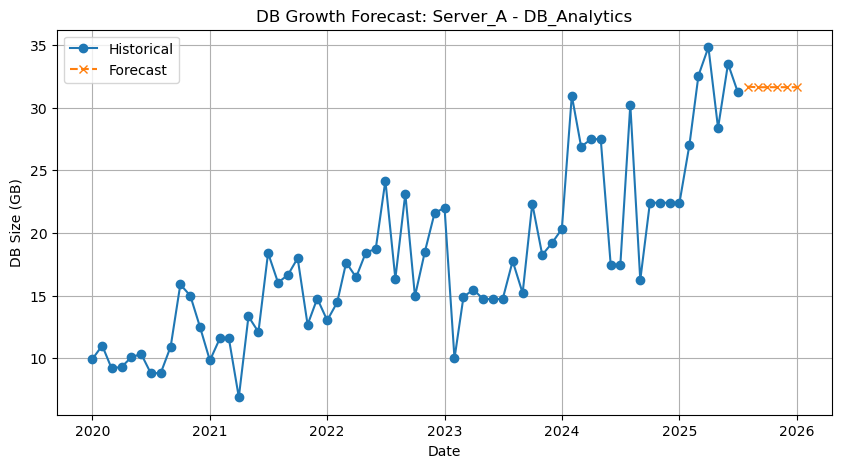

In [1]:
import pickle
import pandas as pd

# Load the saved models
with open("arima_models.pkl", "rb") as f:
    models = pickle.load(f)

# Show available Server-Database combinations
print("Available models:")
for key in models.keys():
    print(key)

# Choose a sample server and database from your saved models
sample_key = list(models.keys())[0]  # just picks the first one
server, db = sample_key
print(f"\nTesting model for Server: {server}, Database: {db}")

# Get the model
model_fit = models[sample_key]

# Forecast for next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future date range for plotting
last_date = model_fit.data.dates[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1),
                             periods=forecast_steps, freq="MS")

# Combine into DataFrame
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_DB_Size_GB": forecast
})

print("\n📈 Forecast for next 6 months:")
print(forecast_df)

# OPTIONAL: Plot the forecast
import matplotlib.pyplot as plt

# Plot historical data
history = model_fit.data.endog
dates = model_fit.data.dates
plt.figure(figsize=(10, 5))
plt.plot(dates, history, label="Historical", marker="o")
plt.plot(future_dates, forecast, label="Forecast", marker="x", linestyle="--")
plt.title(f"DB Growth Forecast: {server} - {db}")
plt.xlabel("Date")
plt.ylabel("DB Size (GB)")
plt.legend()
plt.grid(True)
plt.show()
